# Exercise 3

Setting up the Python environment

In [1]:
import numpy as np
import numpy.linalg as la
from numpy import inf
import matplotlib.pyplot as plt

# The following is some settings for the figures.
# This can be manipulated to get nice plots included in pdf-documents.
newparams = {'figure.figsize': (8.0, 5.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 12}
plt.rcParams.update(newparams)

Function to help make a tridiagonal matrix

In [2]:
def tridiag(c, a, b, N):
    # Returns a tridiagonal matrix A=tridiag(c, a, b) of dimension N x N.
    e = np.ones(N)        # array [1,1,...,1] of length N
    A = c*np.diag(e[1:],-1)+a*np.diag(e)+b*np.diag(e[1:],1)
    return A

Defining the right hand side

In [3]:
def f(x):
    return np.sin(np.pi*x)

Defining the left point

In [4]:
alpha = 0

The right boundary point is a bit more tricky. The first finite difference approximation of $u_x$ is
\begin{equation}
 u_x(1) = \frac{u_M-u_{M-1}}{h} + O(h)
\end{equation}
Therefore, the right hand boundary equation becomes
\begin{equation}
\frac{u_M-u_{M-1}}{h} + u_{M+1} = 1
\end{equation}

We would like to write this in matrix form, if we use the same stencil as before, only the last row changes

\begin{equation}
    \frac{1}{h^2}\cdot\begin{bmatrix}
        2  & -1 & 0  &  \cdots & 0\\
        -1 & 2  & -1 &  \cdots & 0\\
        0  & -1 & 2  & \ddots & 0 \\
        \vdots & \ddots &\ddots & \ddots & \vdots \\
        0    & \cdots  & -1  & 1 & h \\
    \end{bmatrix} \begin{bmatrix}
    u_0\\
    \vdots\\
    \vdots\\
    u_M\\
    u_{M+1}
    \end{bmatrix} = \begin{bmatrix}
    0\\
    f(x_1)\\
    \vdots\\
    f(x_M)\\
    h
    \end{bmatrix}
\end{equation}

We can modify the original code to construct this linear problem:

In [5]:
def bvp_1(f, alpha, beta, M=10):
    # Solve the BVP -u''(x)=f(x), u(0)=alpha, u(1)=beta
    # by a central difference scheme.
    h = 1/M
    Ah = tridiag(-1,2,-1,M)/h**2      # Set up the coefficient matrix
    
    # Modify Ah for scheme 1
    Ah[M-1][M-1], Ah[M-1][M-2], Ah[M-1][M-3] = h, 1, -1
    
    x = np.linspace(0,1,M+1)    # gridpoints, including the boundary points
    xi = x[1:]             # inner gridpoints
    F = f(xi)                # evaluate f in the inner gridpoints
    F[0] = F[0]+alpha/h**2   # include the contribution from the boundaries
    F[-1] = h

    # Solve the linear equation system
    Ui = la.solve(Ah, F)        # the solution in the inner gridpoints

    # Include the boundary points in the solution vector
    U = np.zeros(M+1)
    U[0] = alpha
    U[1:] = Ui
    return x, U

Run the code

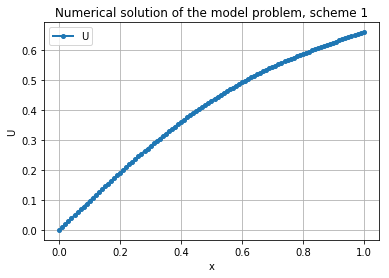

In [6]:
alpha, beta, M = 0, 0, 100       # boundary values

# Solve the BVP
x, U = bvp_1(f, alpha, beta, M)

#And plot the solution
plt.plot(x, U,'.-')
plt.xlabel('x')
plt.ylabel('U')
plt.title('Numerical solution of the model problem, scheme 1')
plt.legend(['U'])
plt.show()

Test if the equation holds, the output should be one

In [7]:
print(U[-1] + M*(U[-2]-U[-3]))

0.9999999999999997
